In [1]:
import os
import json
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
coco_json = json.load(open('../data/train.json'))
images = coco_json['images']
annotations = coco_json['annotations']
categories = {k['id']:k['name'] for k in coco_json['categories']}

COLOR = {
    'finger': (120,203,228),
    'Trapezoid': (145,42,177),
    'Pisiform': (145,42,177),
    'Radius': (210,71,77),
    'Ulna': (210,71,77),
    'wrist': (193,223,159)
}

In [26]:
def random_vis(root_dir: str, rows: int, cols: int):
    idxs = random.sample(list(range(len(images))), rows*cols)
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    
    for i, idx in enumerate(idxs):
        r, c = i//cols, i%cols
        img_path = os.path.join(root_dir, images[idx]['file_name'])
        img = Image.open(img_path).convert("RGB")
        candits = [k for k in annotations if k['image_id'] == images[idx]['id']]
        
        for candit in candits:
            bbox = candit['bbox']
            bbox = [int(k) for k in bbox]
            cat_id = candit['category_id']
            cat_name = categories[cat_id]
            if cat_name.startswith("finger"):
                color_name = "finger"
            elif cat_name not in COLOR:
                color_name = "wrist"
            else:
                color_name = cat_name
            color = [num/255 for num in COLOR[color_name]]
            
            bbox_rect = patches.Rectangle(
                (bbox[0], bbox[1]), 
                bbox[2], bbox[3], 
                linewidth=1, 
                edgecolor=color, 
                facecolor='none'
            )
            
            candit = candit['segmentation'][0]
            seg = [[candit[i], candit[i+1]] for i in range(0, len(candit), 2)]
            poly = patches.Polygon(
                seg, 
                closed=True, 
                fill=True, 
                color=color, 
                alpha=0.3
            )
    
            axes[r][c].add_patch(bbox_rect)
            axes[r][c].add_patch(poly)
            axes[r][c].annotate(
                cat_name, 
                (bbox[0]+5, bbox[1]-10), 
                color='white', 
                weight='bold', 
                fontsize=8,
                backgroundcolor=color
            )
    
        axes[r][c].imshow(img)
        axes[r][c].axis('off')
        axes[r][c].set_title(img_path.split('/')[-1], fontsize=20)
    
    plt.tight_layout()
    plt.show()

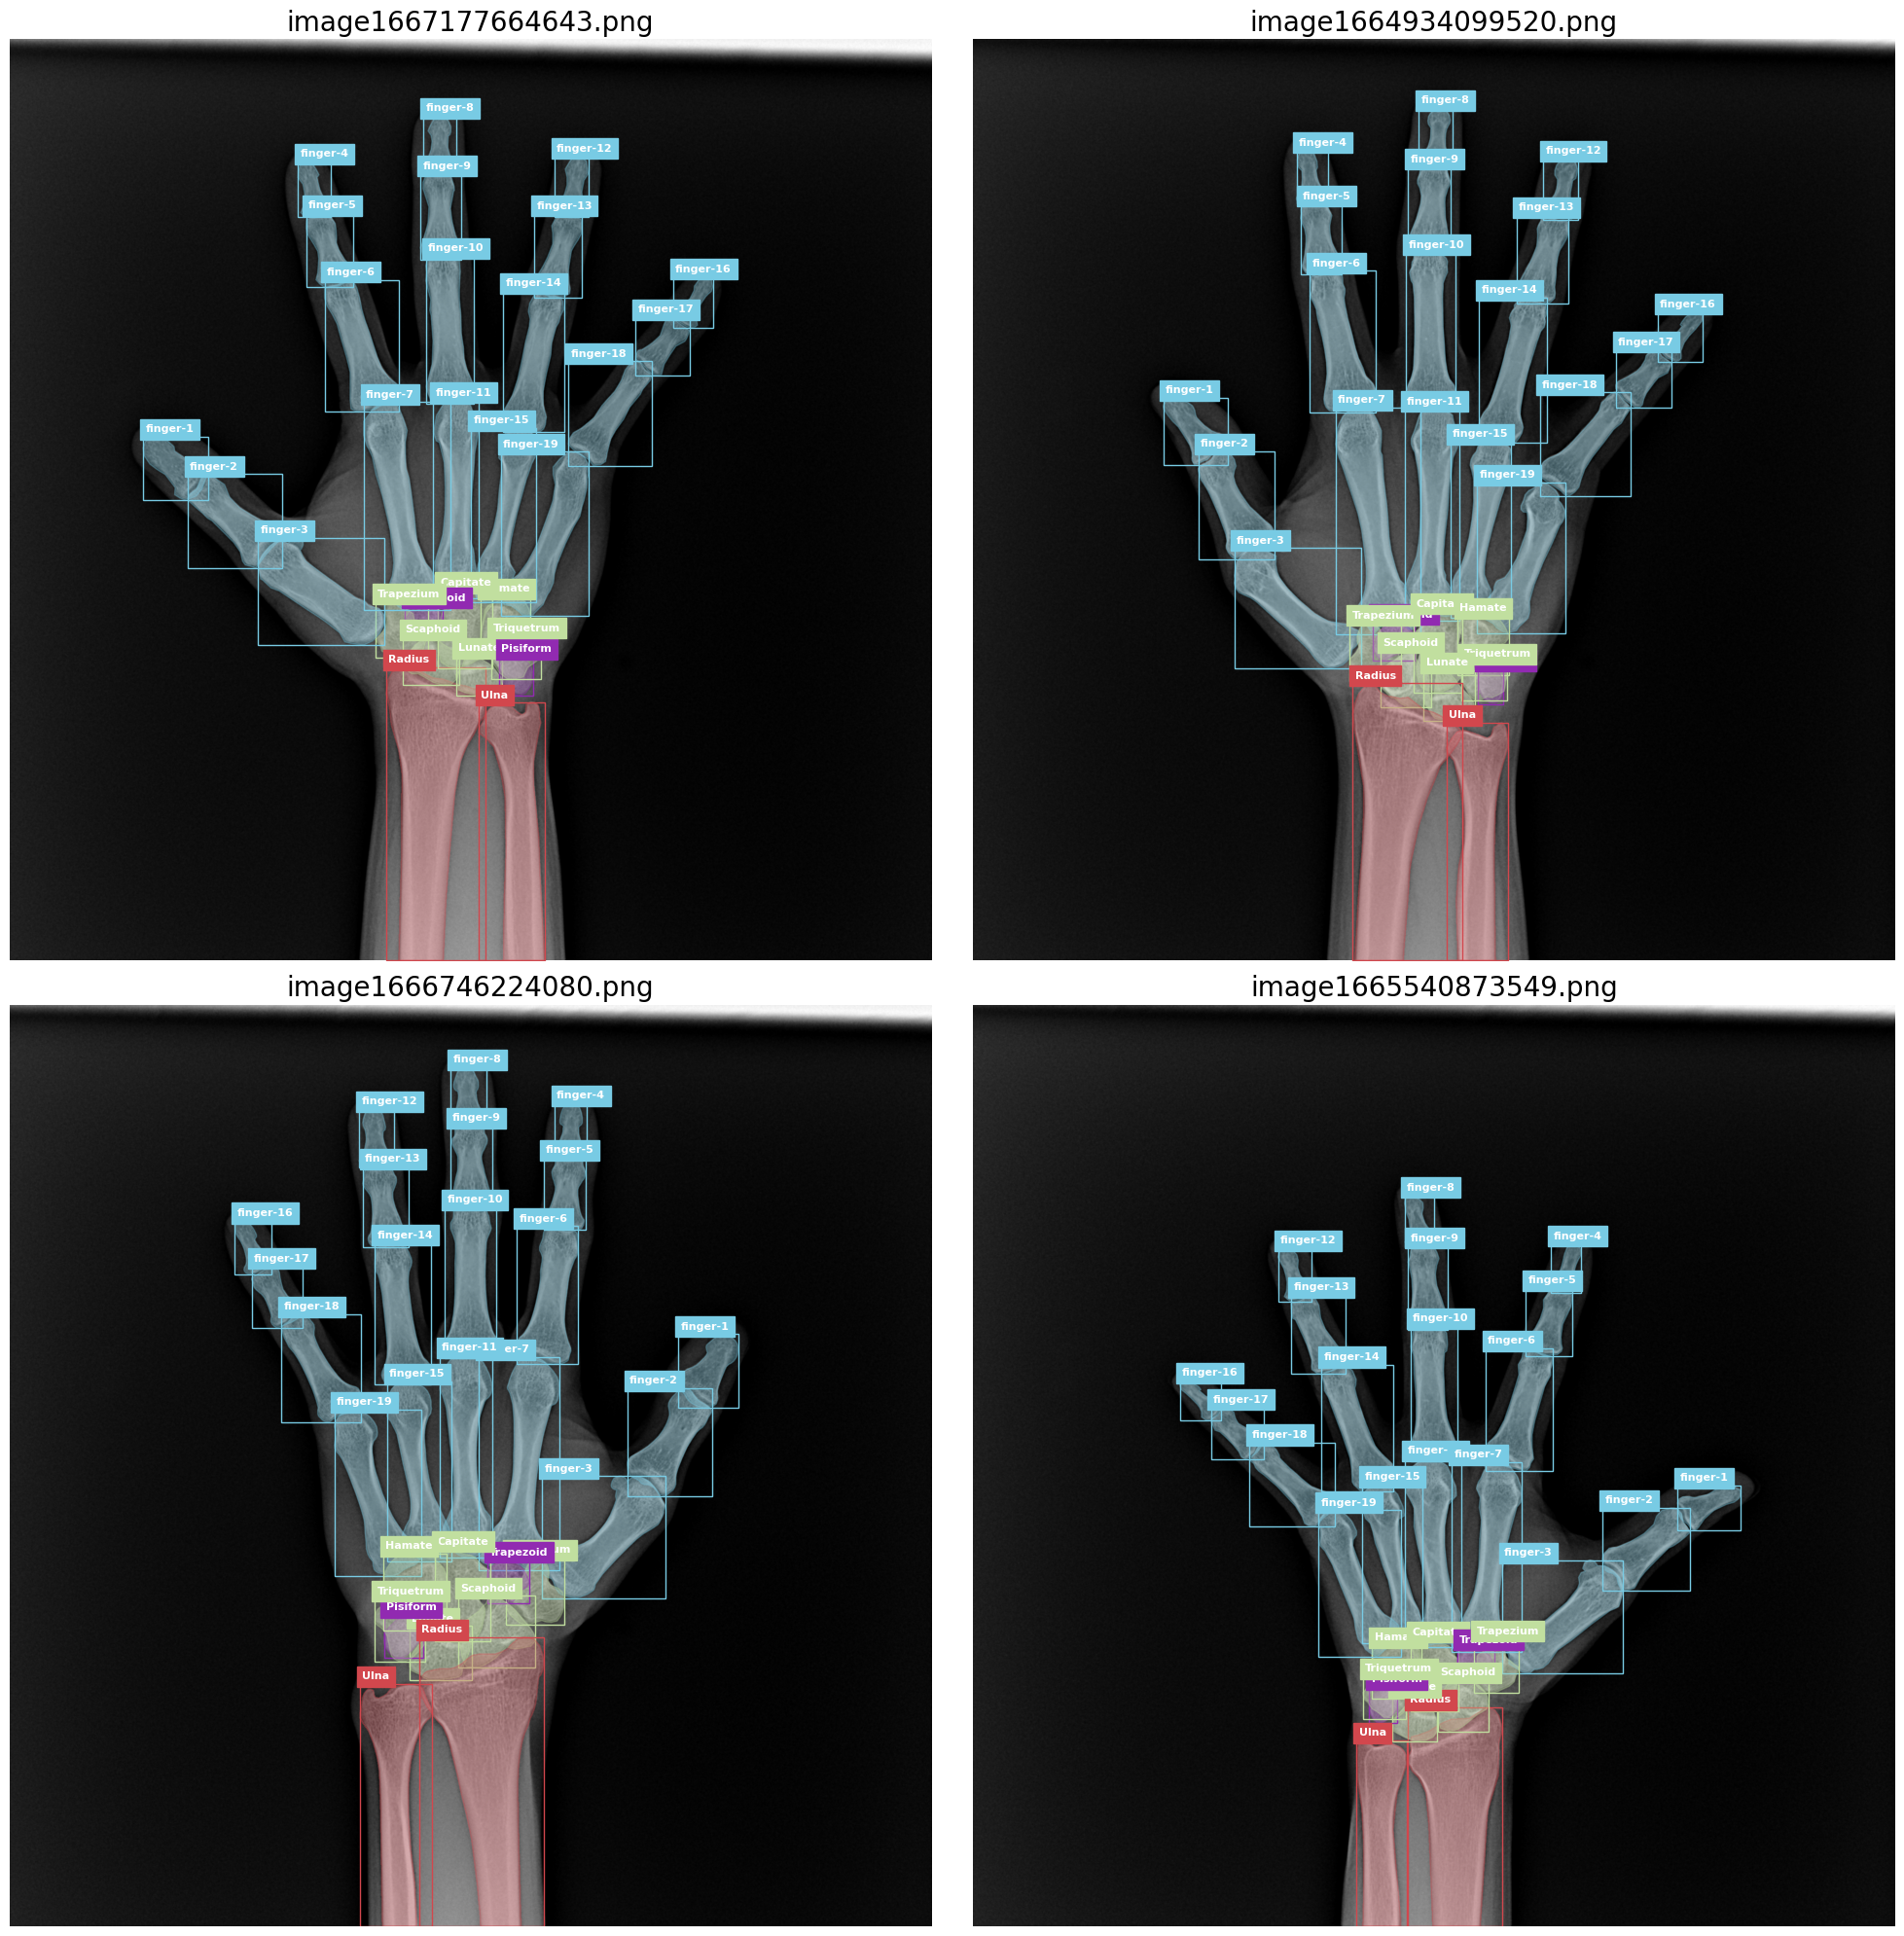

In [27]:
random_vis("../data/train", 2, 2)